In [2]:
import cv2
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/EVA/Session_13/Assignment_A

Mounted at /content/drive
/content/drive/My Drive/EVA/Session_13/Assignment_A


In [2]:
!wget https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip

--2020-10-26 18:36:46--  https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
Resolving pysource.com (pysource.com)... 104.24.125.175, 104.24.124.175, 172.67.180.33
Connecting to pysource.com (pysource.com)|104.24.125.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2890443 (2.8M) [application/zip]
Saving to: ‘yolo_object_detection.zip’

yolo_object_detecti 100%[===================>]   2.76M  --.-KB/s    in 0.1s    

2020-10-26 18:36:47 (23.4 MB/s) - ‘yolo_object_detection.zip’ saved [2890443/2890443]



In [3]:
!unzip yolo_object_detection.zip
!rm -r *.py *.zip *.jpg

Archive:  yolo_object_detection.zip
  inflating: room_ser.jpg            
  inflating: yolo_object_detection.py  
  inflating: coco.names              
  inflating: yolov3.cfg              


In [4]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-10-26 18:40:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   125KB/s    in 25m 22s 

2020-10-26 19:06:05 (159 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
! cp ./gdrive/'My Drive'/YoloV3_data/OpevCV_yolov3_wt/yolov3.weights .


In [ ]:
https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip

In [4]:
net = cv2.dnn.readNet("./yolov3.weights", "./yolov3.cfg")
classes = []
with open("./coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [5]:
cat ./coco.names

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


In [10]:
img = cv2.imread("sri.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [11]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [12]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,20))
plt.imshow(img[:,:,::-1])
plt.show()


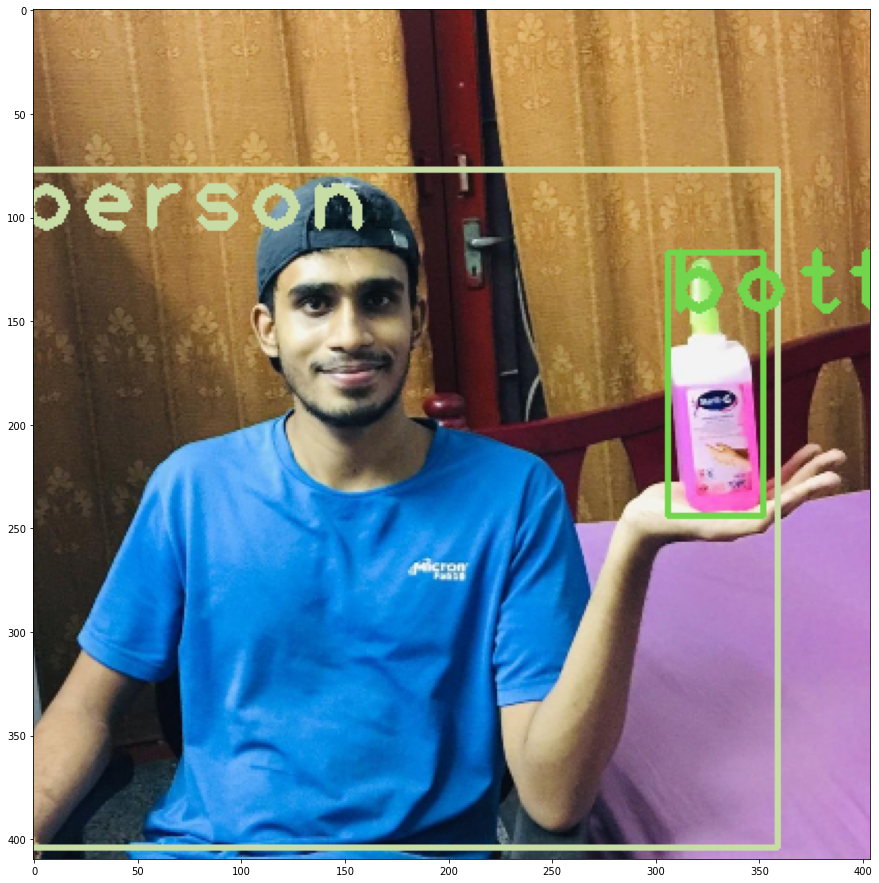

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,20))
plt.imshow(img[:,:,::-1])
plt.show()


In [14]:
cv2.imwrite("./COCO_Yolov3.jpg", img)

True